# Jupyter Notebook: Parsing Excel file and Visualizing Data

In this notebook, we will load a Excel file, convert it to a pandas DataFrame, and then create visualizations using seaborn and matplotlib.

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['seaborn'])
await piplite.install(['openpyxl'])

In [2]:
# Import necessary libraries
import pandas as pd  # for data manipulation
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting graphs

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

<ipython-input-2-75ab99035214>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # for data manipulation


## Step 1: Load Excel File

In [3]:
# Load the Excel file into a pandas DataFrame
file_path = 'Smoky-Hill-Library-NO2.xlsx'  # Update with actual path to the file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
df.head()

,date,min,max,median,q1,q3,stdev,count
0,2024-08-13T00:00:00.000Z,8.36,15.45,9.44,8.52,10.34,2.442,6
1,2024-08-14T00:00:00.000Z,7.87,19.32,10.43,9.74,14.20,3.133,16
2,2024-08-15T00:00:00.000Z,7.04,25.31,11.58,8.85,20.22,5.915,17
3,2024-08-16T00:00:00.000Z,9.49,25.42,18.88,11.42,21.13,5.149,15
4,2024-08-17T00:00:00.000Z,7.87,15.09,11.37,10.01,12.70,1.943,15


## Step 2: Locate the Date, Min, Max, and Median Data

In [4]:
# Select relevant columns: date, min, max, median
date_min_max_median_df = df[['date', 'min', 'max', 'median']]

# Display the first few rows of the selected data
date_min_max_median_df.head(10)

,date,min,max,median
0,2024-08-13T00:00:00.000Z,8.36,15.45,9.44
1,2024-08-14T00:00:00.000Z,7.87,19.32,10.43
2,2024-08-15T00:00:00.000Z,7.04,25.31,11.58
3,2024-08-16T00:00:00.000Z,9.49,25.42,18.88
4,2024-08-17T00:00:00.000Z,7.87,15.09,11.37
5,2024-08-18T00:00:00.000Z,8.69,26.02,14.68
6,2024-08-19T00:00:00.000Z,8.67,25.29,12.35
7,2024-08-20T00:00:00.000Z,8.89,22.41,11.98
8,2024-08-21T00:00:00.000Z,8.15,20.90,8.77
9,2024-08-22T00:00:00.000Z,8.35,24.53,9.57


## Step 3: Calculate Summary Statistics 

In [5]:
# Calculate summary statistics for min, max, and median columns
summary_stats = date_min_max_median_df[['min', 'max', 'median']].describe()

# Display the summary statistics
summary_stats

,min,max,median
count,37.000000,37.000000,37.000000
mean,6.256486,20.665135,9.938649
std,1.699920,4.802931,2.495823
min,3.470000,13.230000,6.350000
25%,4.630000,16.770000,8.300000
50%,6.350000,21.380000,9.070000
75%,7.870000,25.290000,10.940000
max,9.490000,28.820000,18.880000


## Step 3: Visualize Data using Seaborn

<ipython-input-7-181687805bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_min_max_median_df['date'] = pd.to_datetime(date_min_max_median_df['date'])


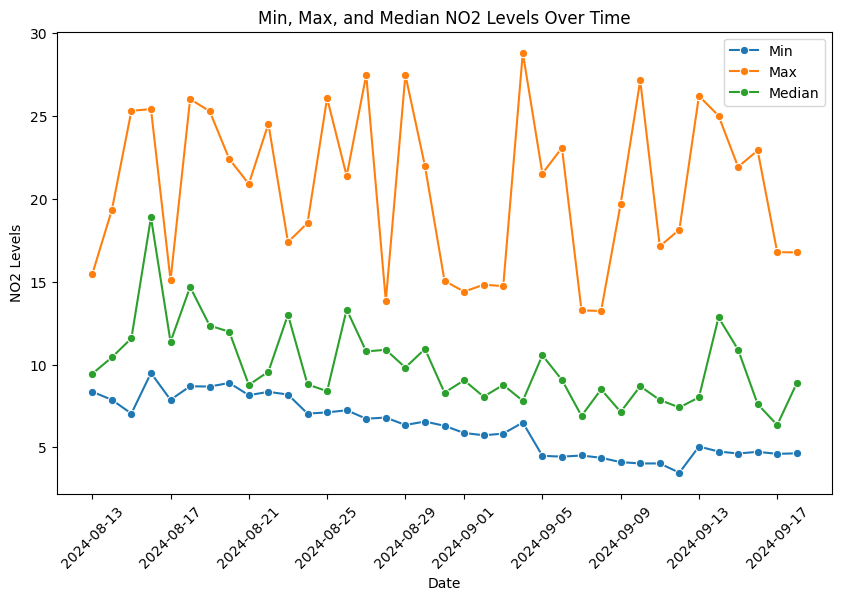

In [7]:
# Convert the Date column to datetime format
date_min_max_median_df['date'] = pd.to_datetime(date_min_max_median_df['date'])

# Plot the Min, Max, and Median values over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='min', data=date_min_max_median_df, marker='o', label='Min')
sns.lineplot(x='date', y='max', data=date_min_max_median_df, marker='o', label='Max')
sns.lineplot(x='date', y='median', data=date_min_max_median_df, marker='o', label='Median')
plt.title('Min, Max, and Median NO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('NO2 Levels')
plt.xticks(rotation=45)
plt.legend()
plt.show()

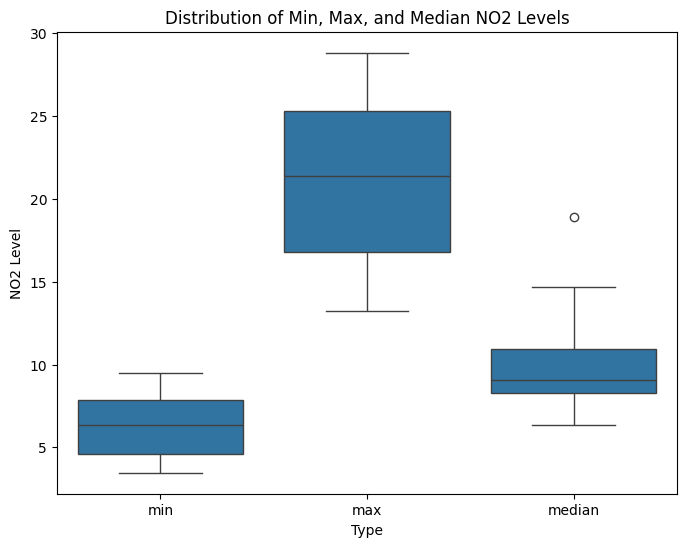

In [8]:
# Melt the data for easier plotting with seaborn
melted_df = date_min_max_median_df.melt(id_vars='date', value_vars=['min', 'max', 'median'], var_name='Type', value_name='NO2 Level')

# Create a box plot for Min, Max, and Median values
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='NO2 Level', data=melted_df)
plt.title('Distribution of Min, Max, and Median NO2 Levels')
plt.xlabel('Type')
plt.ylabel('NO2 Level')
plt.show()